# Hệ hỗ trợ ra quyết định

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Các bước chuẩn bị

In [ ]:
#cài đặt các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pathlib as Path
import matplotlib.pyplot as plt

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/dataMovie/ratings.csv')
movies = pd.read_csv('/content/drive/MyDrive/dataMovie/movies.csv')
ratings_table = ratings.pivot(index='userId', columns='movieId', values='rating')
ratings_table.to_csv('/content/drive/MyDrive/dataMovie/ratings.csv', index=True)
ratings_table

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#kiểm tra dữ liệu ratings
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#kiểm tra dữ liệu moives
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Phân tích dữ liệu:

In [ ]:
#số lượng người dùng và số lượng phim, min ratings,max ratings
print('Số lượng người dùng: ', ratings['userId'].nunique())
print('Số lượng phim: ', movies['movieId'].nunique())
print('Min ratings: ', ratings['rating'].min())
print('Max ratings: ', ratings['rating'].max())

Số lượng người dùng:  610
Số lượng phim:  9742
Min ratings:  0.5
Max ratings:  5.0


In [ ]:
#Tạo ra df Movie_data
movie_data = pd.merge(ratings,movies,on='movieId')
movie_data = movie_data.drop(['genres','timestamp'],axis=1)
print(movie_data)

        userId  movieId  rating                             title
0            1        1     4.0                  Toy Story (1995)
1            5        1     4.0                  Toy Story (1995)
2            7        1     4.5                  Toy Story (1995)
3           15        1     2.5                  Toy Story (1995)
4           17        1     4.5                  Toy Story (1995)
...        ...      ...     ...                               ...
100831     610   160341     2.5                  Bloodmoon (1997)
100832     610   160527     4.5  Sympathy for the Underdog (1971)
100833     610   160836     3.0                     Hazard (2005)
100834     610   163937     3.5                Blair Witch (2016)
100835     610   163981     3.5                         31 (2016)

[100836 rows x 4 columns]


In [ ]:
#Tạo Dataframe để thông kê
trend = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number od ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
print(trend)

                                             rating  total number od ratings
title                                                                       
'71 (2014)                                 4.000000                        1
'Hellboy': The Seeds of Creation (2004)    4.000000                        1
'Round Midnight (1986)                     3.500000                        2
'Salem's Lot (2004)                        5.000000                        1
'Til There Was You (1997)                  4.000000                        2
...                                             ...                      ...
eXistenZ (1999)                            3.863636                       22
xXx (2002)                                 2.770833                       24
xXx: State of the Union (2005)             2.000000                        5
¡Three Amigos! (1986)                      3.134615                       26
À nous la liberté (Freedom for Us) (1931)  1.000000                        1

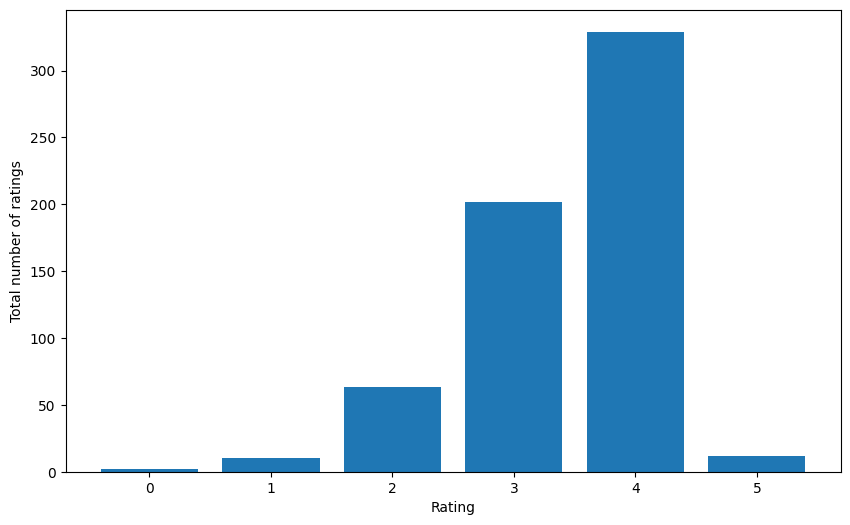

In [ ]:
#Biểu đồ thống kê số lượng ratings
plt.figure(figsize=(10,6))
ax = plt.bar(trend['rating'].round(),trend['total number od ratings'])
plt.xlabel('Rating')
plt.ylabel('Total number of ratings')
plt.show()

<ipython-input-21-735977923de1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation = 60, fontsize = '10',horizontalalignment='right')


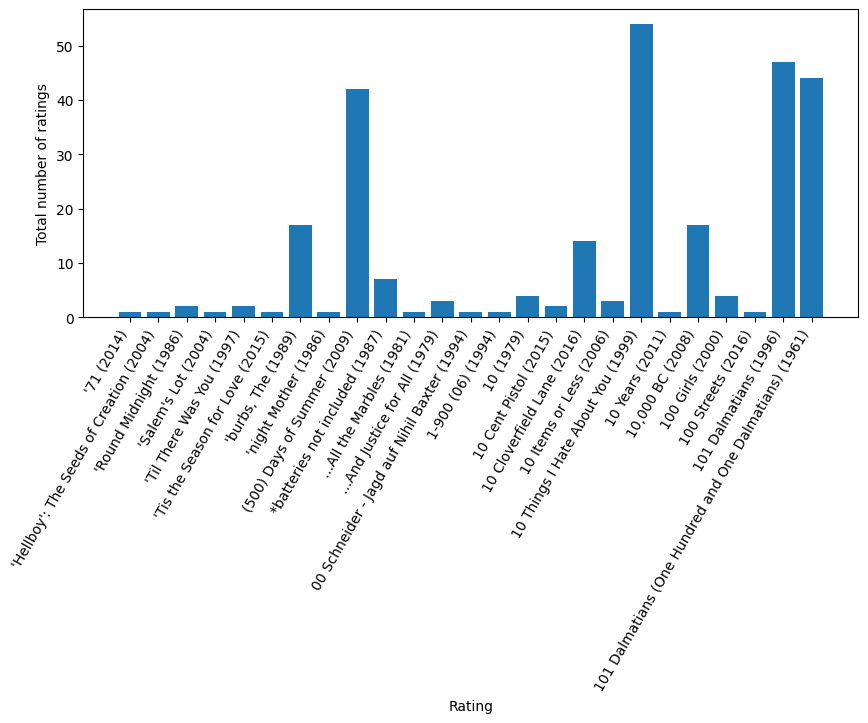

In [ ]:
#Số lượng đánh giá trong 25 bộ phim trong top trending
plt.figure(figsize=(10,4))
ax = plt.subplot()
ax.bar(trend.head(25).index,trend['total number od ratings'].head(25))
ax.set_xticklabels(trend.index,rotation = 60, fontsize = '10',horizontalalignment='right')
plt.xlabel('Rating')
plt.ylabel('Total number of ratings')
plt.show()

## Collaborative Filtering (Lọc cộng tác)

### 1. Lấy trung bình các cột

In [ ]:
user_avg_ratings = ratings_table.mean(axis=1)


### 2. Chuẩn hóa ma trận bằng cách trừ đi trung bình

In [ ]:
normalized_ratings_tables = ratings_table.sub(user_avg_ratings, axis=0)
normalized_ratings_table = normalized_ratings_tables.fillna(0)

normalized_ratings_table



movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,0.000000,-0.366379,0.0,0.0,-0.366379,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.363636,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-1.157399,0.000000,0.000000,0.0,0.0,0.000000,-1.157399,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.213904,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,-0.634176,-1.134176,-1.134176,0.0,0.0,0.000000,0.000000,0.0,0.0,0.865824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

#Lấy Index (movieId) các bộ phim mà User_to_recommend chưa cho điểm ratings
def unrated_movie_index(User_to_recommend):
    #Chọn dòng tương ứng với User_to_recommend từ ratings_table
    user_ratings = ratings_table.loc[User_to_recommend]

    #Lấy chỉ mục (movieId) của các giá trị NaN trong dòng đã chọn
    nan_movie_ids = user_ratings[user_ratings.isna()].index

    #Tạo DataFrame mới với chỉ mục là các movieId NaN và các cột là các giá trị NaN tương ứng
    nan_ratings_df = pd.DataFrame(index=nan_movie_ids, columns=['Rating'])

    return nan_ratings_df

### Xây dựng ma trận tương quan User-User

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Tính ma trận tương quan giữa các người dùng bằng Cosine Similarity
user_similarity_matrix = cosine_similarity(normalized_ratings_table)

# Chuyển ma trận tương quan thành DataFrame
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=normalized_ratings_table.index, columns=normalized_ratings_table.index)

# Đặt giá trị UserId-UserId thành 0
np.fill_diagonal(user_similarity_matrix, 0)
user_similarity_df



userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.001265,0.000553,0.048419,0.021847,-0.045497,-0.006200,0.047013,0.019510,-0.008754,...,0.018127,-0.017172,-0.015221,-0.037059,-0.029121,0.012016,0.055261,0.075224,-0.025713,0.010932
2,0.001265,0.000000,0.000000,-0.017164,0.021796,-0.021051,-0.011114,-0.048085,0.000000,0.003012,...,-0.050551,-0.031581,-0.001688,0.000000,0.000000,0.006226,-0.020504,-0.006001,-0.060091,0.024999
3,0.000553,0.000000,0.000000,-0.011260,-0.031539,0.004800,0.000000,-0.032471,0.000000,0.000000,...,-0.004904,-0.016117,0.017749,0.000000,-0.001431,-0.037289,-0.007789,-0.013001,0.000000,0.019550
4,0.048419,-0.017164,-0.011260,0.000000,-0.029620,0.013956,0.058091,0.002065,-0.005874,0.051590,...,-0.037687,0.063122,0.027640,-0.013782,0.040037,0.020590,0.014628,-0.037569,-0.017884,-0.000995
5,0.021847,0.021796,-0.031539,-0.029620,0.000000,0.009111,0.010117,-0.012284,0.000000,-0.033165,...,0.015964,0.012427,0.027076,0.012461,-0.036272,0.026319,0.031896,-0.001751,0.093829,-0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.012016,0.006226,-0.037289,0.020590,0.026319,-0.009137,0.028326,0.022277,0.031633,-0.039946,...,0.053683,0.016384,0.098011,0.061078,0.019678,0.000000,0.017927,0.056676,0.038422,0.075464
607,0.055261,-0.020504,-0.007789,0.014628,0.031896,0.045501,0.030981,0.048822,-0.012161,-0.017656,...,0.049059,0.038197,0.049317,0.002355,-0.029381,0.017927,0.000000,0.044514,0.019049,0.021860
608,0.075224,-0.006001,-0.013001,-0.037569,-0.001751,0.021727,0.028414,0.071759,0.032783,-0.052000,...,0.069198,0.051388,0.012801,0.006319,-0.007978,0.056676,0.044514,0.000000,0.050714,0.054454


### Hàm

In [ ]:


#Lấy các giá trị UserId đã thực sự vote cho movie_id tương ứng.
def get_user_ids_list(movie_id):
    # Lấy cột tương ứng với movie_id từ ratings_table
    movie_ratings = ratings_table[movie_id]

    # Lọc ra các giá trị không phải NaN
    non_nan_ratings = movie_ratings.dropna()

    # Tạo DataFrame chứa giá trị rating và index (user id) tương ứng
    user_ratings_df = pd.DataFrame({'user_id': non_nan_ratings.index, 'rating': non_nan_ratings.values})

    # Lấy danh sách user_ids
    user_ids_list = user_ratings_df['user_id'].to_list()

    return user_ids_list


#Tạo DataFrame các giá trị Similarity của User_to_recommend với tất cả các User.
def get_sorted_user_similarity(User_to_recommend):
    # Lấy dòng tương ứng với User_to_recommend từ user_similarity_df
    user_similarity_row = user_similarity_df.loc[User_to_recommend]

    # Tạo DataFrame mới chứa các giá trị tương quan và user_id tương ứng
    user_similarity_values_df = pd.DataFrame({'user_id': user_similarity_df.index, 'similarity': user_similarity_row.values})

    # Loại bỏ User_to_recommend từ DataFrame
    user_similarity_values_df = user_similarity_values_df[user_similarity_values_df['user_id'] != User_to_recommend]

    # Sắp xếp theo giảm dần theo giá trị tương quan
    user_similarity_values_df = user_similarity_values_df.sort_values(by='similarity', ascending=False)

    return user_similarity_values_df


#Ghép các cột giá tri cần thiết bao gồm normalized_rating và user_id
def get_sorted_merged_df_filtered(movie_id, user_similarity_values_df, normalized_ratings_table, user_ids_list):
    # Lấy cột tương ứng với movie_id từ normalized_ratings_table
    normalized_ratings = normalized_ratings_table[movie_id]

    # Tạo DataFrame mới chứa giá trị normalized và user_id tương ứng
    normalized_ratings_df = pd.DataFrame({'user_id': normalized_ratings.index, 'normalized_rating': normalized_ratings.values})

    # Ghép user_similarity_values_df và normalized_ratings_df theo cột 'user_id'
    merged_df = pd.merge(user_similarity_values_df, normalized_ratings_df, on='user_id')

    # Loại bỏ các hàng không có trong user_ids_list
    sorted_merged_df_filtered = merged_df[merged_df['user_id'].isin(user_ids_list)]

    return sorted_merged_df_filtered


#Sắp xếp và hiển thị giá trị predicted tương ứng đối với N bộ phim cho User_to_recommend
def create_top_movies_with_title(predicted_ratings_library, movies, N):
    # Chuyển thư viện thành DataFrame
    predicted_ratings_df = pd.DataFrame(predicted_ratings_library)

    # Lấy N phim có predicted rating cao nhất
    top_movies = predicted_ratings_df.nlargest(N, 'predicted_rating')

    # Kết hợp thông tin từ DataFrame movies vào top_movies
    top_movies_with_title = pd.merge(top_movies, movies[['movieId', 'title']], left_on='movie_id', right_on='movieId')

    # Loại bỏ cột 'movieId'
    top_movies_with_title = top_movies_with_title.drop(columns=['movieId'])

    # Di chuyển cột 'predicted_rating' sang vị trí thứ 3
    top_movies_with_title = top_movies_with_title[['movie_id', 'title', 'predicted_rating']]

    return top_movies_with_title


def predicted(User_to_recommend):

    predicted_ratings_library = []

    for movie_id in unrated_movie_index(User_to_recommend).index:

        #Lấy các giá trị UserId đã thực sự vote cho movie_id tương ứng
        a = get_user_ids_list(movie_id)

        #Tạo DataFrame các giá trị Similarity của User_to_recommend với tất cả các User.
        b = get_sorted_user_similarity(User_to_recommend)

        #Ghép các cột giá tri cần thiết bao gồm normalized_rating và user_id
        c = get_sorted_merged_df_filtered(movie_id, b, normalized_ratings_table, a)

        # Lấy 5 giá trị đầu tiên của sorted_merged_df_filtered
        top_users = c.head(5)

        # Tính giá trị predicted_ratings theo công thức
        predicted_ratings = (top_users['similarity'] * top_users['normalized_rating']).sum() / abs(top_users['normalized_rating']).sum()

        # Chuẩn hóa lại giá trị predicted_ratings
        predicted_ratings = user_avg_ratings[User_to_recommend] + predicted_ratings

        # Ghi nhận thông tin vào thư viện
        predicted_ratings_library.append({'movie_id': movie_id, 'predicted_rating': predicted_ratings})

    #Sắp xếp và hiển thị giá trị predicted tương ứng đối với N bộ phim cho User_to_recommend
    result = create_top_movies_with_title(predicted_ratings_library, movies, 5)

    return result



### Collaborative Filtering (Lọc cộng tác)

In [ ]:
# Nhập id người dùng để recommend
User_to_recommend = int(input("Nhập ID người dùng: "))
predicted(User_to_recommend)

Nhập ID người dùng: 50


<ipython-input-26-6207123824de>:91: RuntimeWarning: invalid value encountered in scalar divide
  predicted_ratings = (top_users['similarity'] * top_users['normalized_rating']).sum() / abs(top_users['normalized_rating']).sum()
<ipython-input-26-6207123824de>:91: RuntimeWarning: invalid value encountered in scalar divide
  predicted_ratings = (top_users['similarity'] * top_users['normalized_rating']).sum() / abs(top_users['normalized_rating']).sum()


,movie_id,title,predicted_rating
0,2632,"Saragossa Manuscript, The (Rekopis znaleziony ...",2.920779
1,4064,Coffy (1973),2.920779
2,4393,Another Woman (1988),2.920779
3,4408,September (1987),2.920779
4,4687,Billy Liar (1963),2.920779
